## Multiple Linear Regression from Scratch

In [19]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the dataset

In [20]:
# Load the dataframe
df = pd.read_csv('data/week2/student.csv')
df.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [21]:
math = df['Math'].to_numpy()
read = df['Reading'].to_numpy()
write = df['Writing'].to_numpy()

/tmp/ipykernel_37207/2097655675.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
/home/akash/.virtualenvs/datascience/lib/python3.8/site-packages/IPython/core/pylabtools.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


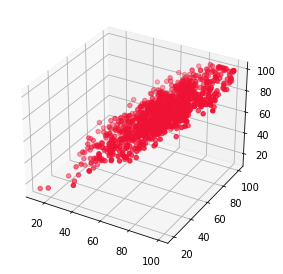

In [22]:
from mpl_toolkits.mplot3d import Axes3D
# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef1234')
plt.show()

### Preprocessing the dataset

In [23]:
# Seperate features and target variable
X = df.iloc[:, :2]
y = df.iloc[:, -1]
# Initial random weights
theta1 = np.random.randn(X.shape[1])
# Initial bias
theta0 = 0

# Scaling the dataset to fit the model
def scale(X):
    new = X - np.mean(X, axis=0)
    return new / np.std(new, axis=0)

X = scale(X)

In [24]:
def train_test_split(x,y,test_size):
    total = len(X)
    a = np.arange(len(X))
    np.random.shuffle(a)
    test_count = int(len(X)*test_size)
    train_count = int(len(X) - test_count)
    X_train = X[:train_count]
    y_train = y[:train_count]
    X_test = X[:test_count]
    y_test = y[:test_count]
    return X_train, X_test, y_train, y_test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,0.25)

In [26]:
# Printing the size of datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(750, 2) (250, 2) (750,) (250,)


## Linear Regression from Scratch

In [27]:
def cost_function(X, y, theta1, theta0):
    """
    Parameters:
    X: features
    y: target values
    w: weights
    b: bias
    
    Returns:
    cost: cost with current weights and bias
    """
    cost = np.sum((((X.dot(theta1) + theta0) - y) ** 2) / (2*len(y)))
    return cost

In [28]:
def gradient_descent_function(X, y, theta1, theta0, alpha=0.01, epochs=1000):
    """
    Parameters:
    X: features
    y: target values
    w: initial weights
    b: initial bias
    alpha: learning rate
    epochs: number of iterations
    
    Returns:
    costs: cost per epoch
    w: finalised weights
    b: finalised bias
    """
    m = len(y)
    costs = [0] * epochs
    
    for epoch in range(epochs):
        # Calculate the value -- Forward Propagation
        z = X.dot(theta1) + theta0
        
        # Calculate the losses
        loss = z - y
        
        # Calculate gradient descent
        weight_gradient = X.T.dot(loss) / m
        bias_gradient = np.sum(loss) / m
        
        # Update weights and bias
        theta1 = theta1 - alpha*weight_gradient
        theta0 = theta0 - alpha*bias_gradient
        
        # Store current lost
        cost = cost_function(X, y, theta1, theta0)
        costs[epoch] = cost
        
    return theta1, theta0, costs

In [29]:
theta1_weights, theta0_bias, costs = gradient_descent_function(X_train, y_train, theta1, theta0, epochs=2500);

In [30]:
print(theta1_weights)
print(theta0_bias)

Math        1.374042
Reading    13.319999
dtype: float64
68.7872860991552


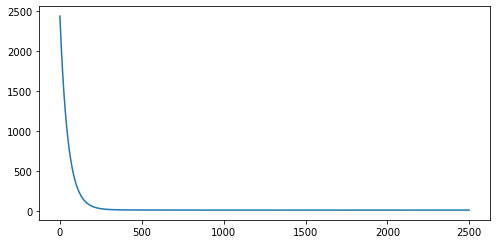

In [31]:
import matplotlib.pyplot as plt
# Plotting the cost function
plt.plot(costs)
plt.show()

### Calculating the performace of our model

In [32]:
def predict(X, theta1, theta0):
    return X.dot(theta1) + theta0

In [33]:
def r2score(y_pred, y):
    """
    Parameters:
    y_pred: predicted values
    y: actual values
    
    Returns:
    r2: r2 score
    """
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

In [34]:
# Predicted values with our model
y_pred = predict(X_test, theta1_weights, theta0_bias)

In [35]:
r2 = r2score(y_pred, y_test)
print(r2)

0.9145961123684286


The r2 value of our model is 0.91 which is impressive.